In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string
from nltk import FreqDist
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from wordcloud import WordCloud


In [10]:
df = pd.read_csv('https://raw.githubusercontent.com/LearnDataSci/articles/master/Python%20Pandas%20Tutorial%20A%20Complete%20Introduction%20for%20Beginners/IMDB-Movie-Data.csv')

In [11]:
df.head()


,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


In [12]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [17]:
stop_words = set(stopwords.words('english'))
punctuation = set(string.punctuation)
def preprocess(review):
  words = word_tokenize(review)
  words = [word.lower() for word in words if word.lower() not in stop_words and word.lower() not in punctuation]
  return words
df['Processed_Review'] = df['Description'].apply(preprocess)


df[['Description', 'Processed_Review']].head()



,Description,Processed_Review
0,A group of intergalactic criminals are forced ...,"[group, intergalactic, criminals, forced, work..."
1,"Following clues to the origin of mankind, a te...","[following, clues, origin, mankind, team, find..."
2,Three girls are kidnapped by a man with a diag...,"[three, girls, kidnapped, man, diagnosed, 23, ..."
3,"In a city of humanoid animals, a hustling thea...","[city, humanoid, animals, hustling, theater, i..."
4,A secret government agency recruits some of th...,"[secret, government, agency, recruits, dangero..."


In [22]:
all_words = FreqDist([word for review in df['Processed_Review'] for word in review])
word_features = list(all_words)[:2000]
def document_features(document):
  document_words = set(document)
  for word in word_features:
   {}[f'contains({word})'] = (word in document_words)
   return {}
df['Features'] = df['Processed_Review'].apply(document_features)
df[['Processed_Review', 'Features']].head()


,Processed_Review,Features
0,"[group, intergalactic, criminals, forced, work...",{}
1,"[following, clues, origin, mankind, team, find...",{}
2,"[three, girls, kidnapped, man, diagnosed, 23, ...",{}
3,"[city, humanoid, animals, hustling, theater, i...",{}
4,"[secret, government, agency, recruits, dangero...",{}


In [24]:
df['Processed_Text'] = df['Processed_Review'].apply(lambda x: ' '.join(x))
tfidf_vectorizer = TfidfVectorizer(max_features=2000)
X = tfidf_vectorizer.fit_transform(df['Processed_Text']).toarray()


In [27]:
num_clusters = 2
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(X)
df['Cluster'] = kmeans.labels_
for i in range(num_clusters):print(f"Cluster {i}:")
print(df[df['Cluster'] == i]['Description'].head(), "\n")


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Cluster 0:
Cluster 1:
0    A group of intergalactic criminals are forced ...
1    Following clues to the origin of mankind, a te...
2    Three girls are kidnapped by a man with a diag...
3    In a city of humanoid animals, a hustling thea...
4    A secret government agency recruits some of th...
Name: Description, dtype: object 



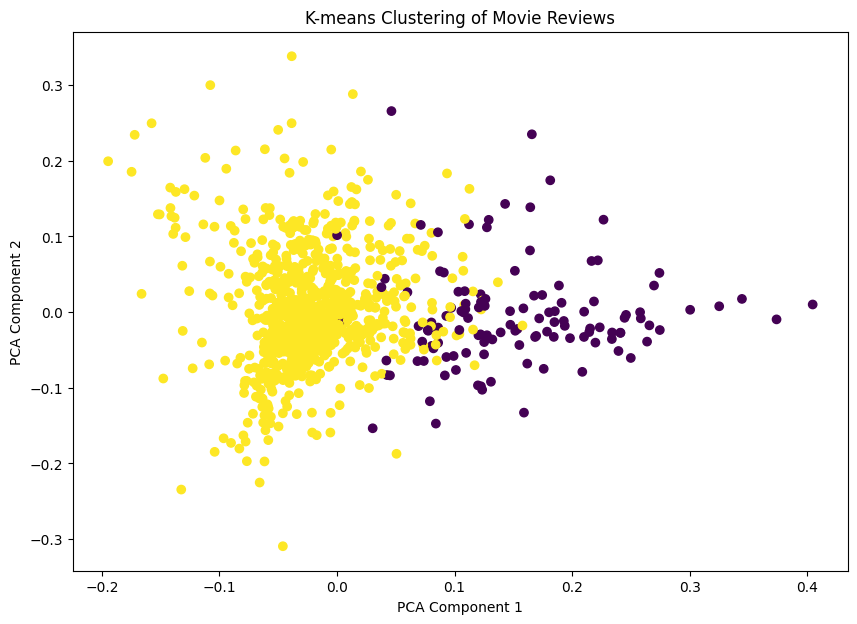

In [30]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
plt.figure(figsize=(10, 7))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['Cluster'], cmap='viridis', marker='o')
plt.title('K-means Clustering of Movie Reviews')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()



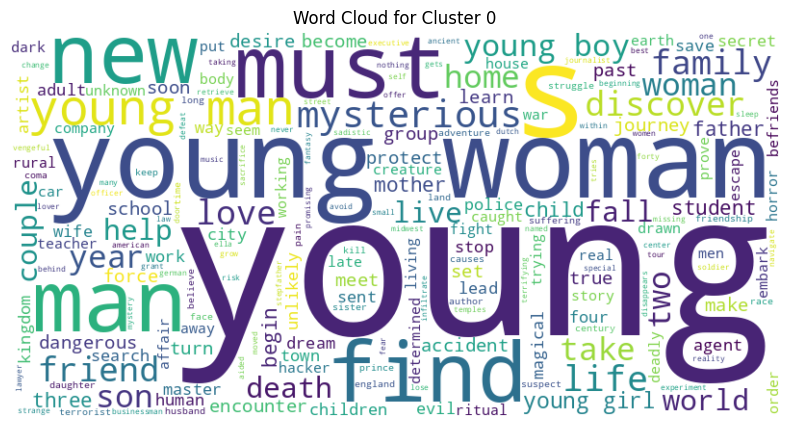

In [38]:
for i in range(num_clusters):
    # Get the text for the current cluster
   cluster_reviews = df[df['Cluster'] == 0]['Processed_Text'].str.cat(sep=' ')

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(cluster_reviews)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Cluster 0')
plt.show()

In [40]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
explained_variance = pca.explained_variance_ratio_
print(f"Explained variance by the two components: {explained_variance.sum() * 100:.2f}%")


Explained variance by the two components: 1.12%


In [44]:
num_clusters = 2
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(X_pca)
df['Cluster'] = kmeans.labels_
for i in range(num_clusters):print(f"Cluster {i}:")
print(df[df['Cluster'] == i]['Description'].head(), "\n")


Cluster 0:
Cluster 1:
2     Three girls are kidnapped by a man with a diag...
26    In ancient India, an adventurous and daring ma...
27    A young woman must save herself and her friend...
41    A chronicle of the childhood, adolescence and ...
44    A young street artist in East Los Angeles is c...
Name: Description, dtype: object 



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


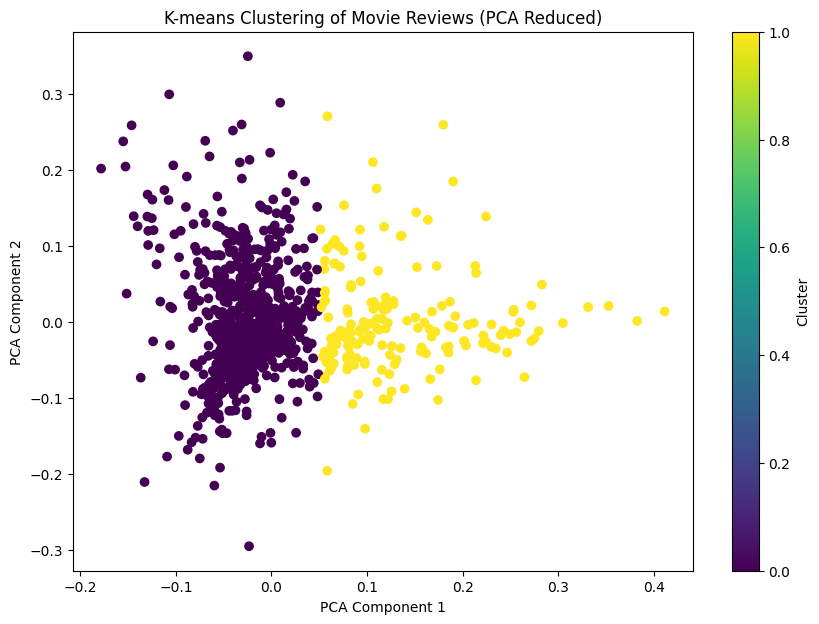

In [45]:
plt.figure(figsize=(10, 7))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['Cluster'], cmap='viridis', marker='o')
plt.title('K-means Clustering of Movie Reviews (PCA Reduced)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.show()
